# Análisis Exploratorio FastF1
https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

In [171]:
#FastF1
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps

#MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.cbook as cbook
import matplotlib.image as image
from matplotlib import style
import matplotlib.ticker as ticker
from matplotlib.collections import LineCollection
import matplotlib as mpl



from timple.timedelta import strftimedelta

In [167]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [126]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [128]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
driver = input('Piloto: ')

Año: 2022
Round: 12
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto: VER


In [129]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for French Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '14', '4', '31', '3', '18', '5', '10', '23', '77', '47', '24', '6', '20', '16', '22']


In [130]:
lap = session.laps.pick_driver(driver).pick_fastest()

In [131]:
print(lap)

Time                      0 days 01:34:33.110000
DriverNumber                                   1
LapTime                   0 days 00:01:37.491000
LapNumber                                     30
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.667000
Sector2Time               0 days 00:00:29.686000
Sector3Time               0 days 00:00:43.138000
Sector1SessionTime        0 days 01:33:20.286000
Sector2SessionTime        0 days 01:33:49.972000
Sector3SessionTime        0 days 01:34:33.110000
SpeedI1                                    109.0
SpeedI2                                    279.0
SpeedFL                                    289.0
SpeedST                                    317.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    14.0
FreshTyre           

In [180]:
lap.telemetry.info()
#lap.telemetry['Gear']

<class 'fastf1.core.Telemetry'>
Int64Index: 745 entries, 2 to 746
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   745 non-null    datetime64[ns] 
 1   SessionTime            745 non-null    timedelta64[ns]
 2   DriverAhead            745 non-null    object         
 3   DistanceToDriverAhead  0 non-null      float64        
 4   Time                   745 non-null    timedelta64[ns]
 5   RPM                    745 non-null    int64          
 6   Speed                  745 non-null    int64          
 7   nGear                  745 non-null    int64          
 8   Throttle               745 non-null    int64          
 9   Brake                  745 non-null    bool           
 10  DRS                    745 non-null    int64          
 11  Source                 745 non-null    object         
 12  Distance               745 non-null    float64        
 

In [173]:
# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed'] 

In [174]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

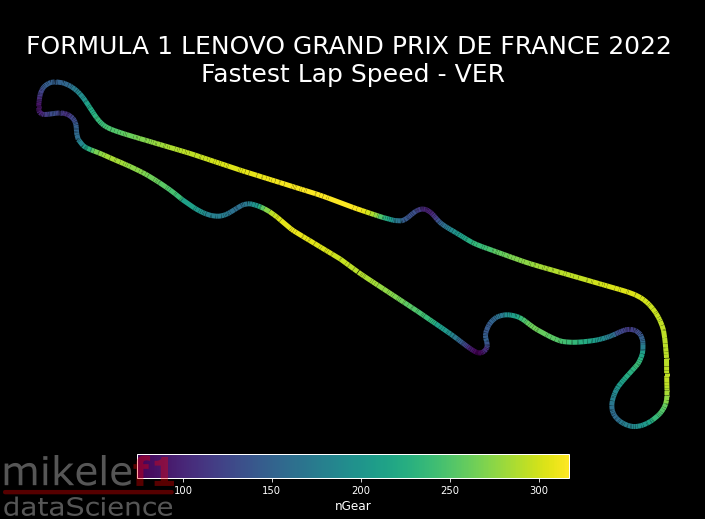

In [181]:
# We create a plot with title and adjust some setting to make it look good.
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

colormap = mpl.cm.viridis
#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]


plt.suptitle(f"\n{session.event['OfficialEventName']} \n Fastest Lap Speed - {driver} \n"
             , size=25, y=1.02)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal", label="nGear")

fig.figimage(im, 3, 3, zorder=13, alpha=.35)



# Show the plot
#plt.savefig('2022-12-FP1-G-LEC.png')
plt.show()

In [146]:
# Variables numéricas
# ==============================================================================
lap.telemetry.select_dtypes(include=['float64', 'int']).describe()


,DistanceToDriverAhead,RPM,Speed,nGear,Throttle,DRS,Distance,RelativeDistance,X,Y,Z
count,0.0,745.000000,745.000000,745.000000,745.000000,745.0,745.000000,745.000000,745.000000,745.000000,745.000000
mean,NaN,10125.165101,210.738255,5.375839,60.030872,0.0,2971.994565,0.514607,306.957047,-664.209396,4836.249664
std,NaN,1289.099113,70.641701,1.903154,44.368997,0.0,1676.499633,0.290289,6930.510946,3398.279385,80.607218
min,NaN,6108.000000,74.000000,2.000000,0.000000,0.0,0.028864,0.000005,-11057.000000,-6924.000000,4705.000000
25%,NaN,9285.000000,148.000000,4.000000,0.000000,0.0,1388.779722,0.240470,-6143.000000,-3663.000000,4769.000000
50%,NaN,10560.000000,213.000000,5.000000,92.000000,0.0,2905.832074,0.503151,1677.000000,-438.000000,4853.000000
75%,NaN,11072.000000,279.000000,7.000000,100.000000,0.0,4533.469444,0.784979,6633.000000,2132.000000,4882.000000
max,NaN,12048.000000,317.000000,8.000000,100.000000,0.0,5759.493557,0.997268,10010.000000,5275.000000,5008.000000
